In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization
import zipfile

In [2]:
# Get the current working directory
cwd = os.getcwd()

In [3]:
# Construct the full path to your dataset
dataset_dir = os.path.join(cwd, 'PlantVillage', 'Plant_Village')

In [4]:
#Creating a file for DataAugmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

In [5]:
# Training generator
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [6]:
#creating CONV2D Model 

from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation='softmax'))

C:\Users\ravik\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator, epochs=3, validation_data=validation_generator)

Epoch 1/3


C:\Users\ravik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 3552s 7s/step - accuracy: 0.2222 - loss: 4.7849 - val_accuracy: 0.2676 - val_loss: 3.2606
Epoch 2/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 3554s 7s/step - accuracy: 0.2616 - loss: 2.2532 - val_accuracy: 0.2530 - val_loss: 2.2306
Epoch 3/3
517/517 ━━━━━━━━━━━━━━━━━━━━ 3410s 7s/step - accuracy: 0.3314 - loss: 2.0637 - val_accuracy: 0.2246 - val_loss: 2.3739


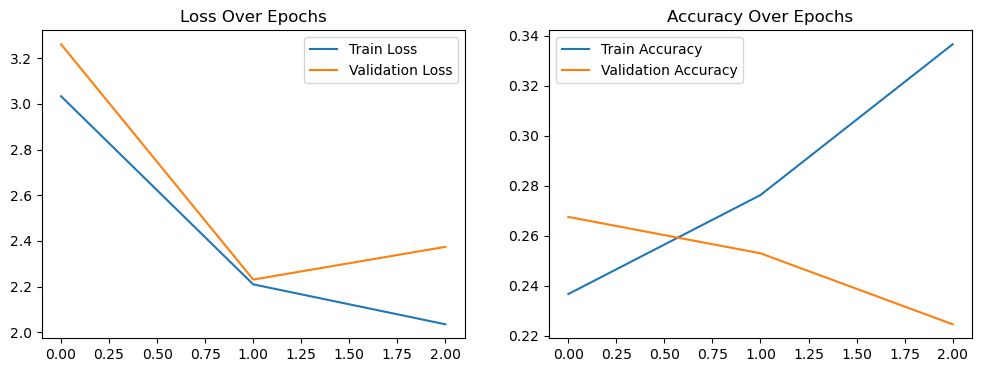

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

In [10]:
model.save('plant_village_model.h5')

**Testing on Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


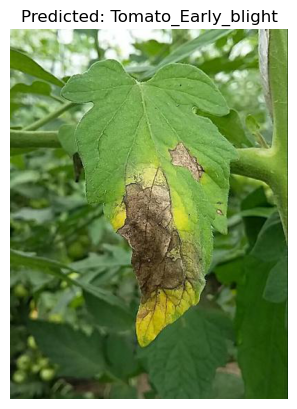

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
model = load_model('plant_village_model.h5')  # Ensure this is the correct model filename

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to an array
    img_array = img_to_array(img)
    # Normalize the image data
    img_array /= 255.0
    # Expand dimensions to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make a prediction and display the result
def predict_and_display(image_path):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)
    # Make a prediction
    prediction = model.predict(img_array)
    # Get the class label
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Class labels for your plant village dataset
    class_labels = [
        'Pepper__bell___Bacterial_spot',
        'Pepper__bell___healthy',
        'Potato___Early_blight',
        'Potato___healthy',
        'Potato___Late_blight',
        'Tomato__Target_Spot',
        'Tomato__Tomato_mosaic_virus',
        'Tomato__Tomato_YellowLeaf__Curl_Virus',
        'Tomato_Bacterial_spot',
        'Tomato_Early_blight',
        'Tomato_healthy',
        'Tomato_Late_blight',
        'Tomato_Leaf_Mold',
        'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite'
    ]

    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(load_img(image_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Test the model on a single image
image_path = 'tomato.jpg'  # Ensure the correct path to your test image
predict_and_display(image_path)
